In [23]:
from IPython.display import Image
Image(filename='Gaussian-Equation.png')

IOError: [Errno 2] No such file or directory: u'Gaussian-Equation.png'

In [11]:
xTest = input('select a test point on range 1-8 : ') # [-2 10]

select a test point : 4


In [16]:
KXXtest = np.zeros((len(xvals[0]),1))

def generateKXXtest():
    for xi in range (0, len(KXXtest), 1): 
        KXXtest[xi,0] = xvals[0][xi] * xTest
        
generateKXXtest()
KXXtest # Nothing is on diagonol. Thus add no noise

array([[  4.],
       [ 12.],
       [ 20.],
       [ 24.],
       [ 28.],
       [ 32.]])

In [34]:
KXtestX = np.zeros((1,len(xvals[0])))

def generateKXtestX():
    for xi in range (0, len(xvals[0]), 1): 
        KXtestX[0,xi] = xvals[0][xi] * xTest
        
generateKXtestX()
KXtestX # Nothing is on diagonol. Thus add no noise

array([[  4.,  12.,  20.,  24.,  28.,  32.]])

In [4]:
KXX = np.zeros((len(xvals[0]), len(xvals[0])))

def generateKXX():
    for xi in range (0, len(KXX), 1): 
        for xj in range (0, len(KXX), 1):
            KXX[xi,xj] = xvals[0][xi] * xvals[0][xj] #np.dot(a,b)
       
generateKXX()
KXX # Add noise to this # Add 5 (or whatever the noise is) to everything on diagonol 

array([[  1.,   3.,   5.,   6.,   7.,   8.],
       [  3.,   9.,  15.,  18.,  21.,  24.],
       [  5.,  15.,  25.,  30.,  35.,  40.],
       [  6.,  18.,  30.,  36.,  42.,  48.],
       [  7.,  21.,  35.,  42.,  49.,  56.],
       [  8.,  24.,  40.,  48.,  56.,  64.]])

In [29]:
KxTestxTest = xTest * xTest
KxTestxTest # add noise to this 

16

In [38]:
#the mean in this case is 0
Y = np.transpose(yvals)
Y

array([[ 0.84147098],
       [ 0.14112001],
       [-0.95892427],
       [-0.2794155 ],
       [ 0.6569866 ],
       [ 0.98935825]])

In [44]:
# MuPrime = 1x6 6x6 6x1
import scipy.linalg as la
muPrime = np.dot(np.dot(KXtestX, la.pinv(KXX)), Y)
muPrime # Heights 

array([[ 0.15885845]])

In [49]:
sigmaPrime = KxTestxTest - KXtestX.dot(la.pinv(KXX)).dot(KXXtest)
sigmaPrime[0][0] # sigma prime is the variance 

0.0

In [22]:
Image(filename='Gaussian-Equation2.png')

NameError: name 'Image' is not defined

#BEGINING 

In [1]:
#Adding Noise
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline 

In [2]:
#putting it all together and graphing it
xvals = np.atleast_2d( [ 1.0, 3.0, 5.0, 6.0, 7.0, 8.0 ] )
yvals = np.sin( xvals )
testPoints = np.linspace(-2, 10, 200, endpoint=True)

In [3]:
KXX = np.zeros((len(xvals[0]), len(xvals[0])))
KXTest = np.zeros((len(xvals[0]),1))
KTestX = np.zeros((1,len(xvals[0])))
KTestTest = 0
Y = np.transpose(yvals)
yOutputs = []
yVariances = []
    
def initialize():
    KXX = np.zeros((len(xvals[0]), len(xvals[0])))
    KXTest = np.zeros((len(xvals[0]),1))
    KTestX = np.zeros((1,len(xvals[0])))
    KTestTest = 0
    Y = np.transpose(yvals)
    yOutputs = []
    yVariances = []

In [4]:
def generateKXTest(kernel, testPoint):
    for xi in range (0, len(KXTest), 1): 
        if kernel == 'linear':
            KXTest[xi,0] = xvals[0][xi] * testPoint  
        elif kernel == 'polynomial':
            poly = (1 + xvals[0][xi] * testPoint)
            KXTest[xi,0] = poly * poly * poly
        elif kernel == 'rbf':
            xMinusY = xvals[0][xi] - testPoint
            KXTest[xi,0] = np.exp(-.5 * xMinusY * xMinusY)
            
        
def generateKTestX(kernel, testPoint):
    for xi in range (0, len(xvals[0]), 1): 
        if kernel == 'linear':
            KTestX[0,xi] = xvals[0][xi] * testPoint
        elif kernel == 'polynomial':
            poly = (1 + xvals[0][xi] * testPoint)
            KTestX[0,xi] = poly * poly * poly
        elif kernel == 'rbf':
            xMinusY = xvals[0][xi] - testPoint
            KTestX[0,xi] = np.exp(-.5 * xMinusY * xMinusY)
        
        
def generateKTestTest(kernel, testPoint, noise):
    if kernel == 'linear':
        return testPoint * testPoint + noise
    elif kernel == 'polynomial':
        poly = testPoint * testPoint
        return poly * poly * poly + noise
    elif kernel == 'rbf':
        xMinusY = testPoint - testPoint
        return np.exp(-.5 * xMinusY * xMinusY)
        

def generateKXX(kernel, noise):
    for xi in range (0, len(KXX), 1): 
        for xj in range (0, len(KXX), 1):
            if kernel == 'linear':
                KXX[xi,xj] = xvals[0][xi] * xvals[0][xj] + noise
            elif kernel == 'polynomial':
                poly = (1 + xvals[0][xi] * xvals[0][xj])
                KXX[xi,xj] = poly * poly * poly + noise
            elif kernel == 'rbf':
                xMinusY = xvals[0][xi] - xvals[0][xj]
                KXX[xi,xj] = np.exp(-.5 * xMinusY * xMinusY)
            

In [26]:
#Initialize
KXX = np.zeros((len(xvals[0]), len(xvals[0])))
KXTest = np.zeros((len(xvals[0]),1))
KTestX = np.zeros((1,len(xvals[0])))
KTestTest = 0
Y = np.transpose(yvals)
yOutputs = []
yVariances = []
upperBound = []
lowerBound = []

In [60]:

y1 = []
y2 = []

def generateResults(kernel, noise):
    generateKXX(kernel,noise) #will remain for all test Points
    upperBound[:] = []
    lowerBound[:] = []
    yOutputs[:] = []
    for val in testPoints: 
        generateKXTest(kernel,val)
        generateKTestX(kernel,val)
        KTestTest = generateKTestTest(kernel,val, noise)
        muPrime = np.dot(np.dot(KTestX, la.pinv(KXX)), Y)
        #yOutputs.append(muPrime[0][0])
        sigmaPrime = KTestTest - KTestX.dot(la.pinv(KXX)).dot(KXTest)[0][0]
        
        
        A = np.power(1+val*xvals,3) # xtest,x
        B = np.linalg.pinv(np.power(1+np.dot(xvals.T,xvals),3)) # x,x
        C = yvals.T
        D = np.dot(A,B)
        E = np.dot(D,C)
        yOutputs.append(E[0])
        
        a1 = KTestTest
        b1 = KTestX
        c1 = la.pinv(KXX)
        d1 = KXTest
        e1 = np.dot(b1,c1)
        f1 = np.dot(e1,d1)
        g1 = a1 - f1
        sigmaPrime = g1[0]
                
        #print sigmaPrime
        yVariances.append(sigmaPrime)
        
    for i in range (0, len(yVariances), 1):
        upperBound.append(abs(yVariances[i]) + yOutputs)
    
    for i in range (0, len(yVariances), 1):
        lowerBound.append(yOutputs- abs(yVariances[i]))
        
    #y1 = [(x+y)[0] for x,y in zip(yOutputs,yVariances)] 
    #y2 = [(x-y)[0] for x,y in zip(yOutputs,yVariances)]
        
generateResults('polynomial',.5)



ValueError: Argument dimensions are incompatible

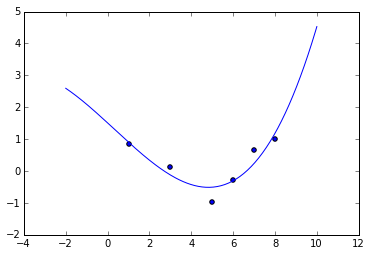

In [59]:
#Initialize Linear With No Noise
KXX = np.zeros((len(xvals[0]), len(xvals[0])))
KXTest = np.zeros((len(xvals[0]),1))
KTestX = np.zeros((1,len(xvals[0])))
KTestTest = 0
Y = np.transpose(yvals)
yOutputs = []
yVariances = []
upperBound = []
lowerBound = []

generateResults('linear',0.0)

plt.scatter(xvals,yvals)
plt.plot(testPoints,yOutputs)
plt.gca().fill_between(testPoints, upperBound[0], lowerBound[0], alpha = .5)
plt.show()

ValueError: Argument dimensions are incompatible

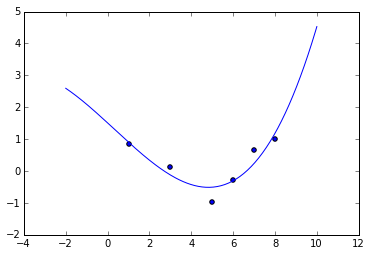

In [55]:
#Initialize Linear With No Noise
KXX = np.zeros((len(xvals[0]), len(xvals[0])))
KXTest = np.zeros((len(xvals[0]),1))
KTestX = np.zeros((1,len(xvals[0])))
KTestTest = 0
Y = np.transpose(yvals)
yOutputs = []
yVariances = []
upperBound = []
lowerBound = []

generateResults('linear',0.1)

plt.scatter(xvals,yvals)
plt.plot(testPoints,yOutputs)
plt.gca().fill_between(testPoints, upperBound[0], lowerBound[0], alpha = .5)
plt.show()

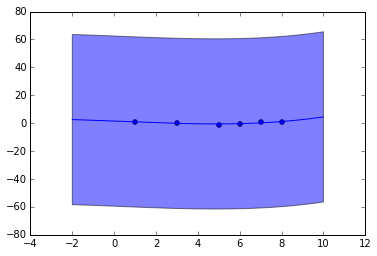

In [16]:
#Initialize Linear With No Noise
KXX = np.zeros((len(xvals[0]), len(xvals[0])))
KXTest = np.zeros((len(xvals[0]),1))
KTestX = np.zeros((1,len(xvals[0])))
KTestTest = 0
Y = np.transpose(yvals)
yOutputs = []
yVariances = []
upperBound = []
lowerBound = []

generateResults('polynomial',0.0)

plt.scatter(xvals,yvals)
plt.plot(testPoints,yOutputs)
plt.gca().fill_between(testPoints, upperBound[0], lowerBound[0], alpha = .5)
plt.show()

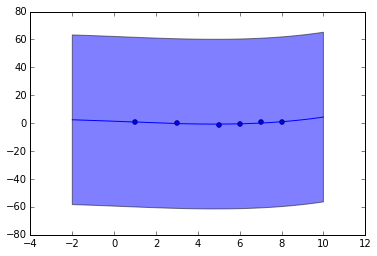

In [17]:
#Initialize Linear With No Noise
KXX = np.zeros((len(xvals[0]), len(xvals[0])))
KXTest = np.zeros((len(xvals[0]),1))
KTestX = np.zeros((1,len(xvals[0])))
KTestTest = 0
Y = np.transpose(yvals)
yOutputs = []
yVariances = []
upperBound = []
lowerBound = []

generateResults('polynomial',0.1)

plt.scatter(xvals,yvals)
plt.plot(testPoints,yOutputs)
plt.gca().fill_between(testPoints, upperBound[0], lowerBound[0], alpha = .5)
plt.show()

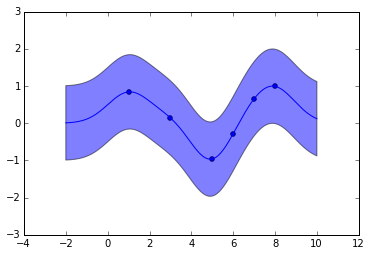

In [18]:
#Initialize Linear With No Noise
KXX = np.zeros((len(xvals[0]), len(xvals[0])))
KXTest = np.zeros((len(xvals[0]),1))
KTestX = np.zeros((1,len(xvals[0])))
KTestTest = 0
Y = np.transpose(yvals)
yOutputs = []
yVariances = []
upperBound = []
lowerBound = []

generateResults('rbf',0.1)

plt.scatter(xvals,yvals)
plt.plot(testPoints,yOutputs)
plt.gca().fill_between(testPoints, upperBound[0], lowerBound[0], alpha = .5)
plt.show()

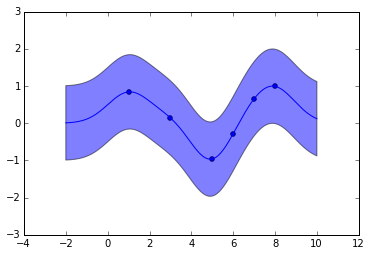

In [19]:
#Initialize Linear With No Noise
KXX = np.zeros((len(xvals[0]), len(xvals[0])))
KXTest = np.zeros((len(xvals[0]),1))
KTestX = np.zeros((1,len(xvals[0])))
KTestTest = 0
Y = np.transpose(yvals)
yOutputs = []
yVariances = []
upperBound = []
lowerBound = []

generateResults('rbf',0.0)

plt.scatter(xvals,yvals)
plt.plot(testPoints,yOutputs)
plt.gca().fill_between(testPoints, upperBound[0], lowerBound[0], alpha = .5)
plt.show()

##Bryce 

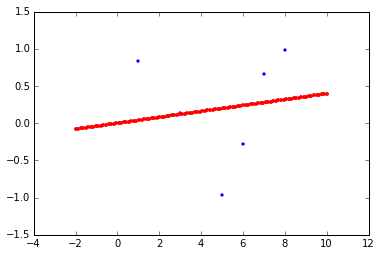

In [61]:
import scipy.io
import numpy 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  


data_xvals = numpy.atleast_2d( [ 1.0, 3.0, 5.0, 6.0, 7.0, 8.0 ] )
data_yvals = numpy.sin( data_xvals )

#print numpy.dot(data_xvals.T,data_xvals)

#k is x*y

plt.scatter(data_xvals,data_yvals,5,color='blue')
plt.plot(data_xvals,data_yvals)


xTestAgainst = numpy.linspace(-2,10,100)

storeVals = []
storeB =[]
for x in xTestAgainst:
   A = x*data_xvals # xtest,x
   #print A
   B = numpy.linalg.pinv(numpy.dot(data_xvals.T,data_xvals)) # x,x
   #print B
   
   #print numpy.dot(A,B)
   C = data_yvals.T
   #print C
   
   D = numpy.dot(A,B)
   E = numpy.dot(D,C)
   storeVals.append(E)
   
   A1 = x*x
   B1 = x*data_xvals
   C1 = numpy.linalg.pinv(numpy.dot(data_xvals.T,data_xvals))
   D1 = (data_xvals*x).T
   
   E1 = numpy.dot(B1,C1)
   F1 = numpy.dot(E1,D1)
   storeB.append(A1 - F1)
   #print storeB
   
y1 = [(x+y)[0][0] for x,y in zip(storeVals,storeB)] 
y2 = [(x-y)[0][0] for x,y in zip(storeVals,storeB)]

#print y1

plt.fill_between(xTestAgainst,y1,y2, 
                  facecolor='yellow', alpha=0.5)
#print storeVals

plt.scatter(xTestAgainst,storeVals,8,color='red')
#plt.scatter(xTestAgainst,y1,8,color='green')
#plt.scatter(xTestAgainst,y1,8,color='green')
plt.show()
   
#[[k(a , b) for b in x] for a in x]

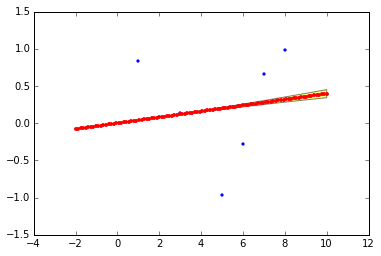

In [67]:
plt.scatter(data_xvals,data_yvals,5,color='blue')
plt.plot(data_xvals,data_yvals)


xTestAgainst = numpy.linspace(-2,10,100)

storeVals = []
storeB =[]
for x in xTestAgainst:
   A = x*data_xvals # xtest,x
   #print A
   B = numpy.linalg.pinv(numpy.dot(data_xvals.T,data_xvals) + (numpy.identity(6)*.1)) # x,x
   #print B
   
   #print numpy.dot(A,B)
   C = data_yvals.T
   #print C
   
   D = numpy.dot(A,B)
   E = numpy.dot(D,C)
   storeVals.append(E)
   
   A1 = x*x
   B1 = x*data_xvals
   C1 = numpy.linalg.pinv(numpy.dot(data_xvals.T,data_xvals) + (numpy.identity(6)*.1))
   D1 = (data_xvals*x).T
   
   E1 = numpy.dot(B1,C1)
   F1 = numpy.dot(E1,D1)
   storeB.append(A1 - F1)
   #print storeB
   
y1 = [(x+y)[0][0] for x,y in zip(storeVals,storeB)] 
y2 = [(x-y)[0][0] for x,y in zip(storeVals,storeB)]

#print y1

plt.fill_between(xTestAgainst,y1,y2, 
                  facecolor='yellow', alpha=0.5)
#print storeVals

plt.scatter(xTestAgainst,storeVals,8,color='red')
#plt.scatter(xTestAgainst,y1,8,color='green')
#plt.scatter(xTestAgainst,y1,8,color='green')
plt.show()
   
#[[k(a , b) for b in x] for a in x]

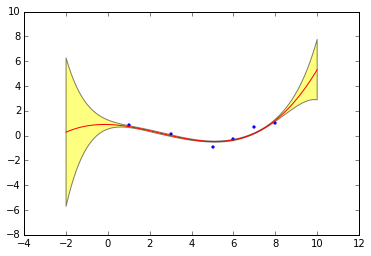

In [62]:

plt.scatter(data_xvals,data_yvals,5,color='blue')
storeNoise = []
storeS = []
for x in xTestAgainst:
   A = numpy.power(1+x*data_xvals,3) # xtest,x
   B = numpy.power(1+numpy.dot(data_xvals.T,data_xvals),3)# x,x
   C = data_yvals.T

   noisyB = numpy.linalg.pinv(B + (numpy.identity(6)*.1)) # noise
   D = numpy.dot(A,noisyB)
   E = numpy.dot(D,C)   
   storeNoise.append(E[0])
   
   A1 = numpy.power(1+x*x,3)
   B1 = numpy.power(1+x*data_xvals,3)
   C1 = numpy.linalg.pinv(numpy.power(1+numpy.dot(data_xvals.T,data_xvals),3) + (numpy.identity(6)*.1)) #noise
   D1 = (numpy.power(1+data_xvals*x,3).T)
   
   E1 = numpy.dot(B1,C1)
   F1 = numpy.dot(E1,D1)
   G1 = A1 - F1
   storeS.append(G1[0])   
   
y1 = [(x+y)[0] for x,y in zip(storeNoise,storeS)] 
y2 = [(x-y)[0] for x,y in zip(storeNoise,storeS)]

plt.plot(xTestAgainst,storeNoise,color='red')

plt.fill_between(xTestAgainst,y1,y2, 
                  facecolor='yellow', alpha=0.5)

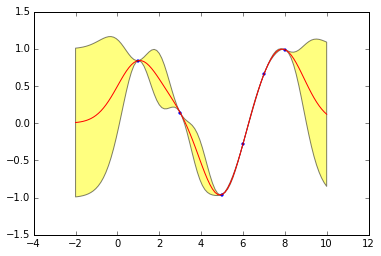

In [63]:
plt.scatter(data_xvals,data_yvals,5,color='blue')
storeVals = []
storeS = []
for x in xTestAgainst:
   A = numpy.exp((-.5)*numpy.power(x-data_xvals,2))
   B = numpy.linalg.pinv(numpy.exp((-.5)*numpy.power(data_xvals.T-data_xvals,2))) # no Noise
   C = data_yvals.T
   D = numpy.dot(A,B)
   E = numpy.dot(D,C)
   storeVals.append(E[0])
  
   A1 = numpy.exp((-.5)*numpy.power(x-x,2))
   B1 = numpy.exp((-.5)*numpy.power(x-data_xvals,2))
   C1 = numpy.linalg.pinv(numpy.exp((-.5)*numpy.power(data_xvals.T-data_xvals,2)))
   D1 = numpy.exp((-.5)*numpy.power(data_xvals-x,2)).T
   
   E1 = numpy.dot(B1,C1)
   F1 = numpy.dot(E1,D1)
   G1 = A1 - F1
   storeS.append(G1[0])
   
y1 = [(x+y)[0] for x,y in zip(storeVals,storeS)] 
y2 = [(x-y)[0] for x,y in zip(storeVals,storeS)]

plt.fill_between(xTestAgainst,y1,y2,facecolor='yellow', alpha=0.5)    
   
plt.plot(xTestAgainst,storeVals,color='red')
plt.show()

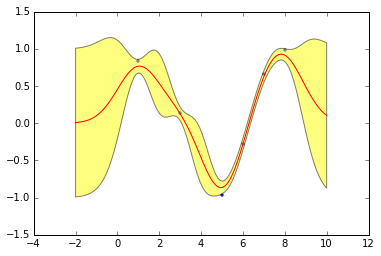

In [64]:
plt.scatter(data_xvals,data_yvals,5,color='blue')
storeVals = []
storeS = []
for x in xTestAgainst:
   A = numpy.exp((-.5)*numpy.power(x-data_xvals,2))
   B = numpy.linalg.pinv(numpy.exp((-.5)*numpy.power(data_xvals.T-data_xvals,2)) + (numpy.identity(6)*.1)) # no Noise
   C = data_yvals.T
   D = numpy.dot(A,B)
   E = numpy.dot(D,C)
   storeVals.append(E[0])
  
   A1 = numpy.exp((-.5)*numpy.power(x-x,2))
   B1 = numpy.exp((-.5)*numpy.power(x-data_xvals,2))
   C1 = numpy.linalg.pinv(numpy.exp((-.5)*numpy.power(data_xvals.T-data_xvals,2)) + (numpy.identity(6)*.1))
   D1 = numpy.exp((-.5)*numpy.power(data_xvals-x,2)).T
   
   E1 = numpy.dot(B1,C1)
   F1 = numpy.dot(E1,D1)
   G1 = A1 - F1
   storeS.append(G1[0])
   
y1 = [(x+y)[0] for x,y in zip(storeVals,storeS)] 
y2 = [(x-y)[0] for x,y in zip(storeVals,storeS)]

plt.fill_between(xTestAgainst,y1,y2,facecolor='yellow', alpha=0.5)    
   
plt.plot(xTestAgainst,storeVals,color='red')
plt.show()

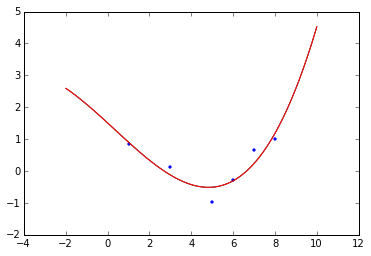

In [66]:

plt.scatter(data_xvals,data_yvals,5,color='blue')
storeNoise = []
storeS = []
for x in xTestAgainst:
   A = numpy.power(1+x*data_xvals,3) # xtest,x
   B = numpy.power(1+numpy.dot(data_xvals.T,data_xvals),3)# x,x
   C = data_yvals.T

   noisyB = numpy.linalg.pinv(B) # noise
   D = numpy.dot(A,noisyB)
   E = numpy.dot(D,C)   
   storeNoise.append(E[0])
   
   A1 = numpy.power(1+x*x,3)
   B1 = numpy.power(1+x*data_xvals,3)
   C1 = numpy.linalg.pinv(numpy.power(1+numpy.dot(data_xvals.T,data_xvals),3)) #noise
   D1 = (numpy.power(1+data_xvals*x,3).T)
   
   E1 = numpy.dot(B1,C1)
   F1 = numpy.dot(E1,D1)
   G1 = A1 - F1
   storeS.append(G1[0])   
   
y1 = [(x+y)[0] for x,y in zip(storeNoise,storeS)] 
y2 = [(x-y)[0] for x,y in zip(storeNoise,storeS)]

plt.plot(xTestAgainst,storeNoise,color='red')

plt.fill_between(xTestAgainst,y1,y2, 
                  facecolor='yellow', alpha=0.5)